In [1]:
# Team Name: G45
# Member:
# 20656207 Liu Xianghua
# 20652823 Luo Liuyue
# 20660351 Zeng Xiangbin
# 20651336 Xu Xiumei

In [2]:
import pandas as pd
import datetime
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import math
import random
import geohash2 as gh

# taxi = pd.read_csv('taxi_train.csv', sep=',')
# taxi.head(10)


# gh.decode('dr5rxth4yu4c')

# Task 1 - Data Preprocessing and Statistics
#
#
# Task 1.1 Read Taxi Data in using the API Pandas.read_csv so that the column 'pickup_datetime' is read as datetime64.
#                 Hint: use the parameter parse_dates
#                  ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
#                 To make sure your code works you might want to read only the first 1000 rows and expand it later
#taxi = pd.read_csv('taxi_train.csv', parse_dates = ['pickup_datetime'], nrows = 1000)
taxi = pd.read_csv('taxi_train.csv', parse_dates = ['pickup_datetime'])
taxi

,pickup_datetime,passenger,pickup_geohash,dropoff_geohash,fare
0,2009-06-15 17:26:00,1,dr5rxth4yu4c,dr5rxeqnjy8v,4.5
1,2010-01-05 16:52:00,1,dr5reer0t0fm,dr72h81uqhe9,16.9
2,2011-08-18 00:35:00,2,dr5rukr7t72n,dr5ru63jpp74,5.7
3,2012-04-21 04:30:00,1,dr5rsrhpybjq,dr5ru7bcpe0c,7.7
4,2010-03-09 07:51:00,1,dr5ruvd4f7wb,dr72j06qth30,5.3
5,2011-01-06 09:50:00,1,dr5rsnfnuw1v,dr5ruey9ftmf,12.1
6,2012-11-20 20:35:00,1,dr5rud97th2k,dr5rutjbmmr6,7.5
7,2012-01-04 17:22:00,1,dr5rvnwq9f4p,dr5ru6d01cfq,16.5
8,2012-12-03 13:10:00,1,dr5reyn4k3w6,dr5rsnzyumf1,9.0
9,2009-09-02 01:11:00,2,dr5rsx2uj8r1,dr5ru7c125sg,8.9


In [3]:
# Task 1.2 Convert the field pickup_geohashed and dropoff_geohashed into x-y coordinate using the API Geohash.decode
#                  The package Geohash can be found from pip. You might encounter the problem 
#                   'python3.5.2 can't find the module '  ref: https://github.com/vinsci/geohash/issues/4
#                    This can be fixed very easily. Or
#                   You might directly use the fixed version of Geohash in our project package.
#                   The precision of each coordinate is with 6 decimal places
pickup_x = []
pickup_y = []
dropoff_x = []
dropoff_y = []
distance = []
for index, row in taxi.iterrows():
    row['pickup_geohash'] = list(round(float(i),6)for i in gh.decode(row['pickup_geohash']))
    pickup_x.append(row['pickup_geohash'][0])
    pickup_y.append(row['pickup_geohash'][1])
    row['dropoff_geohash'] = list(round(float(i),6)for i in gh.decode(row['dropoff_geohash']))
    dropoff_x.append(row['dropoff_geohash'][0])
    dropoff_y.append(row['dropoff_geohash'][1])
    
    
    #X-latitude
    #Y-longitude
    x1 = math.radians(row['dropoff_geohash'][0])
    x2 = math.radians(row['pickup_geohash'][0])
    y1 = math.radians(row['dropoff_geohash'][1])
    y2 = math.radians(row['pickup_geohash'][1])
    dx = math.fabs(x1-x2)
    dy = math.fabs(y1-y2)
    a = math.sin(dx/2)**2 + math.cos(x1) * math.cos(x2) * math.sin(dy/2)**2
    c = 2 * math.asin(math.sqrt(a)) 
    r = 6371 # earth radius
    dist = c * r * 1000
    distance.append(dist)


In [4]:
# Task 1.2.1 Create unpack the decoded pickup_geohashed and dropoff_geohashed into the pair of columns 
#                  pickup_x pickup_y  and dropoff_x, dropoff_y respectively. 
#                  Namely: if pickup is [40.712278, -73.84161]; pickup_x should contain 40.712278 and pickup_y should contain -73.84161
taxi['pickup_x'] = pickup_x
taxi['pickup_y'] = pickup_y
taxi['dropoff_x'] = dropoff_x
taxi['dropoff_y'] = dropoff_y

In [5]:
# Task 1.3 Create the column 'distance' based on the Euclidean distance that the ride has traveled.
taxi['distance'] = distance

In [6]:
# Task 1.4.1  Check the memory you have spent by the API .info()
taxi.info()

# Task 1.4.2  Fetch the first 10 lines of your data to preview it.
taxi.head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
pickup_datetime    40000 non-null datetime64[ns]
passenger          40000 non-null int64
pickup_geohash     40000 non-null object
dropoff_geohash    40000 non-null object
fare               40000 non-null float64
pickup_x           40000 non-null float64
pickup_y           40000 non-null float64
dropoff_x          40000 non-null float64
dropoff_y          40000 non-null float64
distance           40000 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 3.1+ MB


,pickup_datetime,passenger,pickup_geohash,dropoff_geohash,fare,pickup_x,pickup_y,dropoff_x,dropoff_y,distance
0,2009-06-15 17:26:00,1,dr5rxth4yu4c,dr5rxeqnjy8v,4.5,40.721319,-73.844311,40.712278,-73.841610,1030.763935
1,2010-01-05 16:52:00,1,dr5reer0t0fm,dr72h81uqhe9,16.9,40.711303,-74.016048,40.782004,-73.979268,8450.133596
2,2011-08-18 00:35:00,2,dr5rukr7t72n,dr5ru63jpp74,5.7,40.761270,-73.982738,40.750562,-73.991242,1389.525226
3,2012-04-21 04:30:00,1,dr5rsrhpybjq,dr5ru7bcpe0c,7.7,40.733143,-73.987130,40.758092,-73.991567,2799.270240
4,2010-03-09 07:51:00,1,dr5ruvd4f7wb,dr72j06qth30,5.3,40.768008,-73.968095,40.783762,-73.956655,1999.156788
5,2011-01-06 09:50:00,1,dr5rsnfnuw1v,dr5ruey9ftmf,12.1,40.731630,-74.000964,40.758233,-73.972892,3787.239085
6,2012-11-20 20:35:00,1,dr5rud97th2k,dr5rutjbmmr6,7.5,40.751662,-73.980002,40.764842,-73.973802,1555.806659
7,2012-01-04 17:22:00,1,dr5rvnwq9f4p,dr5ru6d01cfq,16.5,40.774138,-73.951300,40.751048,-73.990095,4155.444292
8,2012-12-03 13:10:00,1,dr5reyn4k3w6,dr5rsnzyumf1,9.0,40.726713,-74.006462,40.731628,-73.993078,1253.231513
9,2009-09-02 01:11:00,2,dr5rsx2uj8r1,dr5ru7c125sg,8.9,40.733873,-73.980658,40.758138,-73.991540,2849.626796


In [7]:

# Task 1.5 Remove rows with invalid geohashed. Count the number of rows removed.
wrong_geohashed = taxi[(taxi['pickup_x'] == 0.) | (taxi['pickup_y'] == 0.) |
                       (taxi['dropoff_x'] == 0.) | (taxi['dropoff_y'] == 0.)|
                       (taxi['distance']<=50) | (taxi['distance']>=100000)|
                       (taxi['pickup_x'] <= 35) |(taxi['pickup_x'] >= 45) |
                       (taxi['dropoff_x'] <= 35) |(taxi['dropoff_x'] >= 45) |
                       (taxi['pickup_y'] <= -80) |(taxi['pickup_y'] >= -70) |
                       (taxi['dropoff_y'] <= -80) |(taxi['dropoff_y'] >= -70) 
                        ]
# print(wrong_geohashed)
print(len(wrong_geohashed))
taxi = taxi.dropna(axis=0,how='any')
taxi = taxi.drop(wrong_geohashed.index)

# taxi=taxi[taxi['pickup_x']!=0]
# taxi=taxi[taxi['pickup_y']!=0]
# taxi=taxi[taxi['dropoff_x']!=0]
# taxi=taxi[taxi['dropoff_y']!=0]
# taxi=taxi[taxi['distance']>50]

taxi



1418


,pickup_datetime,passenger,pickup_geohash,dropoff_geohash,fare,pickup_x,pickup_y,dropoff_x,dropoff_y,distance
0,2009-06-15 17:26:00,1,dr5rxth4yu4c,dr5rxeqnjy8v,4.50,40.721319,-73.844311,40.712278,-73.841610,1030.763935
1,2010-01-05 16:52:00,1,dr5reer0t0fm,dr72h81uqhe9,16.90,40.711303,-74.016048,40.782004,-73.979268,8450.133596
2,2011-08-18 00:35:00,2,dr5rukr7t72n,dr5ru63jpp74,5.70,40.761270,-73.982738,40.750562,-73.991242,1389.525226
3,2012-04-21 04:30:00,1,dr5rsrhpybjq,dr5ru7bcpe0c,7.70,40.733143,-73.987130,40.758092,-73.991567,2799.270240
4,2010-03-09 07:51:00,1,dr5ruvd4f7wb,dr72j06qth30,5.30,40.768008,-73.968095,40.783762,-73.956655,1999.156788
5,2011-01-06 09:50:00,1,dr5rsnfnuw1v,dr5ruey9ftmf,12.10,40.731630,-74.000964,40.758233,-73.972892,3787.239085
6,2012-11-20 20:35:00,1,dr5rud97th2k,dr5rutjbmmr6,7.50,40.751662,-73.980002,40.764842,-73.973802,1555.806659
7,2012-01-04 17:22:00,1,dr5rvnwq9f4p,dr5ru6d01cfq,16.50,40.774138,-73.951300,40.751048,-73.990095,4155.444292
8,2012-12-03 13:10:00,1,dr5reyn4k3w6,dr5rsnzyumf1,9.00,40.726713,-74.006462,40.731628,-73.993078,1253.231513
9,2009-09-02 01:11:00,2,dr5rsx2uj8r1,dr5ru7c125sg,8.90,40.733873,-73.980658,40.758138,-73.991540,2849.626796


In [8]:
# Task 1.6  Display the count, mean, standard derviation of the int type variable and 
# display the earliest and latest pickup_time.
# print(taxi)
print(taxi.describe())
print ('earliest pick up',taxi.pickup_datetime.min())
print ('latest pick up',taxi.pickup_datetime.max())


          passenger          fare      pickup_x      pickup_y     dropoff_x  \
count  38582.000000  38582.000000  38582.000000  38582.000000  38582.000000   
mean       1.668395     11.296411     40.751091    -73.975523     40.751473   
std        1.288279      9.285392      0.033122      0.037895      0.036631   
min        0.000000     -3.000000     39.616075    -75.414728     39.604972   
25%        1.000000      6.000000     40.736593    -73.992313     40.735948   
50%        1.000000      8.500000     40.753513    -73.982091     40.754143   
75%        2.000000     12.500000     40.767798    -73.968524     40.768518   
max        6.000000    136.000000     43.098708    -72.856968     43.415190   

          dropoff_y      distance  
count  38582.000000  38582.000000  
mean     -73.974396   3403.595357  
std        0.036920   3864.659120  
min      -75.354559     50.534083  
25%      -73.991361   1298.309984  
50%      -73.980644   2198.222689  
75%      -73.965723   3973.828313  


In [9]:
# Task 1.7 Find the number of order between (8am to 9am)   and the order between (1am to 2am)
#                 Note: Instead of using only the first 1000 rows, expand your selection of rows to collect enough data.
#                Hint: try the API between_time of DataFrame. 
#           ref:  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.between_time.html#pandas.DataFrame.between_time
taxi_time = taxi.set_index(pd.DatetimeIndex(taxi['pickup_datetime']))
start = datetime.time(8,0,0)
end = datetime.time(9,0,0)
between8_9 = taxi_time.between_time(start, end).shape[0]
start = datetime.time(1,0,0)
end = datetime.time(2,0,0)
between1_2 = taxi_time.between_time(start, end).shape[0]
print('order between 8:00-9:00: ', between8_9)
print('order between 1:00-2:00: ', between1_2)



order between 8:00-9:00:  1704
order between 1:00-2:00:  1170


In [10]:
# Task 2 - Data Clustering 
#
#
# Task 2.1 Create a DataFrame that contains two columns. The first column (the index) is a time series 0:00, 0:15, 0:30, 0:45, 
#                  1:00,... 23:00, 23:15, 23:30, 23:45
#                  The second column is an integer that counts the number of ride between in the interval. For example, 0:00 should contains all order happens on or after 0:00 to 0:15.
#  This task is less straight forward, at least in our solution. So let's break down a little bit.



#  Task 2.1.1 Create a list of string containing the series '0:00', '0:15', '0:30', ... '23:45' 
#                     Hint: A double loop with if-else can do the job.
interval = datetime.timedelta(minutes = 15)
start = datetime.time(0,0,0)
end = datetime.time(23,59,59)
step = datetime.time(0,15,0)
time_step = pd.date_range('00:00', '23:59', freq = '15min').time
print(interval)
time_step



0:15:00


array([datetime.time(0, 0), datetime.time(0, 15), datetime.time(0, 30),
       datetime.time(0, 45), datetime.time(1, 0), datetime.time(1, 15),
       datetime.time(1, 30), datetime.time(1, 45), datetime.time(2, 0),
       datetime.time(2, 15), datetime.time(2, 30), datetime.time(2, 45),
       datetime.time(3, 0), datetime.time(3, 15), datetime.time(3, 30),
       datetime.time(3, 45), datetime.time(4, 0), datetime.time(4, 15),
       datetime.time(4, 30), datetime.time(4, 45), datetime.time(5, 0),
       datetime.time(5, 15), datetime.time(5, 30), datetime.time(5, 45),
       datetime.time(6, 0), datetime.time(6, 15), datetime.time(6, 30),
       datetime.time(6, 45), datetime.time(7, 0), datetime.time(7, 15),
       datetime.time(7, 30), datetime.time(7, 45), datetime.time(8, 0),
       datetime.time(8, 15), datetime.time(8, 30), datetime.time(8, 45),
       datetime.time(9, 0), datetime.time(9, 15), datetime.time(9, 30),
       datetime.time(9, 45), datetime.time(10, 0), datetime.t

In [11]:
# Task 2.1.2 Count the number of orders. You might use between_time again.
cluster = pd.DataFrame(data=[],index=[],columns=[])
cluster['interval'] = time_step
number = []
for i in range(len(time_step)-1):
	number.append(taxi_time.between_time(time_step[i], time_step[i+1],include_start = True, include_end=False).shape[0])
number.append(taxi_time.between_time(time_step[i+1], datetime.time(23,59,59),include_start = True, include_end=True).shape[0])
cluster['number'] = number
column_sum = cluster.sum()
print(cluster)



    interval  number
0   00:00:00     402
1   00:15:00     379
2   00:30:00     371
3   00:45:00     321
4   01:00:00     328
5   01:15:00     284
6   01:30:00     279
7   01:45:00     263
8   02:00:00     233
9   02:15:00     201
10  02:30:00     207
11  02:45:00     193
12  03:00:00     185
13  03:15:00     176
14  03:30:00     152
15  03:45:00     140
16  04:00:00     146
17  04:15:00     124
18  04:30:00     100
19  04:45:00      99
20  05:00:00      95
21  05:15:00      80
22  05:30:00      92
23  05:45:00     116
24  06:00:00     125
25  06:15:00     176
26  06:30:00     206
27  06:45:00     290
28  07:00:00     307
29  07:15:00     337
..       ...     ...
66  16:30:00     393
67  16:45:00     378
68  17:00:00     427
69  17:15:00     448
70  17:30:00     518
71  17:45:00     491
72  18:00:00     562
73  18:15:00     585
74  18:30:00     601
75  18:45:00     631
76  19:00:00     556
77  19:15:00     587
78  19:30:00     658
79  19:45:00     603
80  20:00:00     585
81  20:15:00 

In [12]:
# Task 2.2.1  Use K-mean algorithm to find 30 cluster centers of the coordinates obtained from  Task 1.2.1
#                  You may implement your own K-mean algorithm or simply adopt the API sklearn.cluster.KMeans
#                   ref: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html



cluster_x = np.array([taxi['pickup_x'].tolist() + taxi['dropoff_x'].tolist()])
cluster_y = np.array([taxi['pickup_y'].tolist() + taxi['dropoff_y'].tolist()])
position = np.vstack((cluster_x,cluster_y)).T
position_df = pd.DataFrame(position,columns = ['cluster_x','cluster_y'])
kmeans = KMeans(n_clusters=30, random_state=0)
kmeans.fit(position)
print(kmeans)
print(kmeans.cluster_centers_)      










KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=30, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
[[ 40.75437893 -73.99165987]
 [ 40.77071075 -73.86951485]
 [ 40.77866411 -73.95367549]
 [ 40.64512815 -73.78415184]
 [ 41.366138   -73.137393  ]
 [ 40.73821839 -74.00212882]
 [ 40.75591204 -73.97495577]
 [ 40.74190744 -73.98393056]
 [ 39.616138   -73.9635595 ]
 [ 43.41519    -73.266628  ]
 [ 40.68391336 -73.98312066]
 [ 40.706421   -75.3846435 ]
 [ 40.67930875 -74.17708077]
 [ 40.78858306 -73.97383927]
 [ 40.70847829 -73.94879171]
 [ 40.85913489 -73.91520665]
 [ 40.8081496  -73.95129461]
 [ 40.5891625  -72.855954  ]
 [ 40.2540486  -74.042194  ]
 [ 42.164496   -72.8802705 ]
 [ 43.098708   -74.19803   ]
 [ 40.72588903 -73.98999346]
 [ 40.75738103 -73.92034912]
 [ 40.7792835  -74.65134025]
 [ 40.78740323 -73.64117563]
 [ 40.76876426 -73.98337251]
 [ 40.72281829 -73.82965558]
 [ 40.71378428 -74.0086487

In [13]:
# Task 2.2.2 Describe how many % of order has started from a cluster centers and ends at the same cluster centers. 
same_center = 0
data_size = len(taxi)
for i in range(data_size):
	if kmeans.labels_[i] == kmeans.labels_[data_size+i]:
		same_center = same_center + 1
percentage = same_center/data_size
print(percentage)

# C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
# print(C)
# plt.scatter(x, y, c='#050505', s=10)
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=10, c='g')


0.17785495827069617


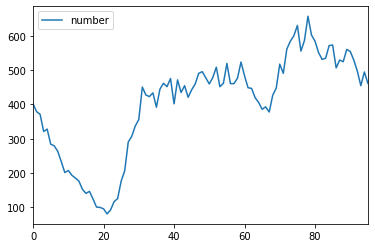

In [14]:
# Task 3 - Simple Data Visualization 
#
#
# Task 3.1 Using data obtained from Task 1.6. Plot a curveof the volume of order in different times of a day.
#                    Hint: try the API DataFrame.plot

cluster.plot()



(array([8.512e+03, 1.503e+03, 6.245e+03, 8.900e+02, 8.000e+00, 7.183e+03,
        9.974e+03, 7.528e+03, 6.000e+00, 1.000e+00, 1.418e+03, 2.000e+00,
        6.900e+01, 4.071e+03, 1.097e+03, 4.070e+02, 1.890e+03, 2.000e+00,
        5.000e+00, 2.000e+00, 1.000e+00, 7.132e+03, 9.670e+02, 4.000e+00,
        3.000e+01, 6.837e+03, 2.930e+02, 4.565e+03, 2.280e+02, 6.294e+03]),
 array([ 0.        ,  0.96666667,  1.93333333,  2.9       ,  3.86666667,
         4.83333333,  5.8       ,  6.76666667,  7.73333333,  8.7       ,
         9.66666667, 10.63333333, 11.6       , 12.56666667, 13.53333333,
        14.5       , 15.46666667, 16.43333333, 17.4       , 18.36666667,
        19.33333333, 20.3       , 21.26666667, 22.23333333, 23.2       ,
        24.16666667, 25.13333333, 26.1       , 27.06666667, 28.03333333,
        29.        ]),
 <a list of 30 Patch objects>)

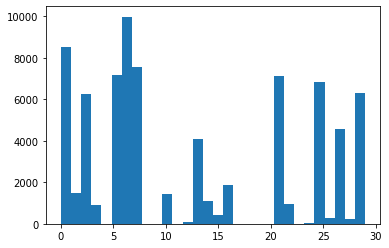

In [15]:
# Task 3.2 Using data obtained from Task 2.2.1. Plot a histogram of the volume of order in different cluster centers
plt.hist(kmeans.labels_, bins=30)

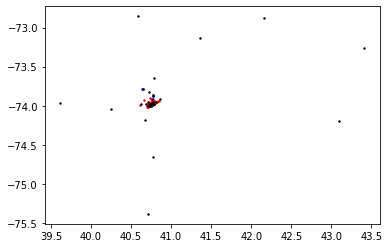

In [16]:
# Task 3.3 Scatter plot the 100 random location of the pickups in blue, 100 random location of dropoffs in red, plot also the cluster centers in black



pickup_random_index = random.sample(list(taxi.index),100)
dropoff_random_index = random.sample(list(taxi.index),100)
for idx in pickup_random_index:
    plt.scatter(taxi.loc[idx,'pickup_x'],taxi.loc[idx,'pickup_y'],s = 2, c = "b")
for idx in dropoff_random_index:
    plt.scatter(taxi.loc[idx,'dropoff_x'],taxi.loc[idx,'dropoff_y'],s = 2, c = "r")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=2, c='000000')


# plt.scatter(taxi.loc[pickup_xy_sample_index,'pickup_x'],taxi.loc[pickup_xy_sample_index,'pickup_y'],c='b')
# plt.scatter(taxi.loc[dropoff_xy_sample_index,'dropoff_x'],taxi.loc[dropoff_xy_sample_index,'dropoff_y'],c='r')
# plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='k',s=0.1)
plt.show()

